In [15]:
# Dependencies
import pandas as pd
import requests
import json
import numpy as np
import gmaps
import matplotlib.pyplot as plt




# OpenWeather & gmaps API Keys
from config import open_weather_key
from config import g_key

cities_pd = pd.read_csv("../Resources/census_city.csv")

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

# delete the unamed index column
del cities_pd['Unnamed: 0']

cities_pd.head(1000)

,City_State,Clean_City,Population,Lat,Lng
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143
...,...,...,...,...,...
79,"New Orleans, Louisiana",New Orleans,389648.0,29.951066,-90.071532
80,"St. Paul, Minnesota",St. Paul,302760.0,44.953703,-93.089958
81,"Minneapolis, Minnesota",Minneapolis,416021.0,44.977753,-93.265011
82,"Boston, Massachusetts",Boston,679413.0,42.360083,-71.058880


In [ ]:
# Pull in tempatures into a list to add to dataframe

cities_pd["Max Temp"] = np.nan
cities_pd["Min Temp"] = np.nan

base_url = f"{url}appid={api_key}&units={units}&q="

for index, row in cities_pd.iterrows():
    query_url = base_url + row[1]
    response = requests.get(query_url).json()
    try:
        max_response = response["main"]["temp_max"]
        min_response = response["main"]["temp_min"]
        cities_pd.loc[index, "Max Temp"] = max_response
        cities_pd.loc[index, "Min Temp"] = min_response
        print(f'{row[0]} is completed  with Max Temp: {max_response} Min Temp: {min_response}.')
    except:
        print(f'{row[0]} was not processed...')

#     print(json.dumps(response, indent=4, sort_keys=True))

In [ ]:
cities_pd.head()


In [ ]:
# clean data frame
cities_pd.dropna(inplace=True)
cities_pd.head()


In [ ]:
# export to csv
cities_pd.to_csv(r'..\resources\weather_city.csv', encoding="utf-8", index=False, header=True)

In [9]:
#Import city temp data
weather_cities_pd = pd.read_csv("../Resources/weather_city.csv")

# Peak battery performance is between 40 & 115 degrees F

weather_cities_pd = weather_cities_pd[weather_cities_pd["Max Temp"] <= 115]
weather_cities_pd = weather_cities_pd[weather_cities_pd["Min Temp"] >= 40]

weather_cities_pd.to_csv(r'..\resources\weather_city_final.csv', encoding="utf-8", index=False, header=True)
weather_cities_pd

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,66.99,64.00
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,66.00,62.60
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,66.00,62.60
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,63.00,59.00
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,48.20,44.01
...,...,...,...,...,...,...,...
72,"Baltimore, Maryland",Baltimore,614700.0,39.290385,-76.612189,48.99,46.00
73,"New Orleans, Louisiana",New Orleans,389648.0,29.951066,-90.071532,68.00,64.99
74,"St. Paul, Minnesota",St. Paul,302760.0,44.953703,-93.089958,55.99,53.01
75,"Minneapolis, Minnesota",Minneapolis,416021.0,44.977753,-93.265011,55.99,53.01


In [10]:
# Create a heat map using Temperature as weight
weather_cities_pd = pd.read_csv("../Resources/weather_city_final.csv")
city_locations = weather_cities_pd[["Lat", "Lng"]].astype(float)
city_temp = weather_cities_pd["Max Temp"].astype(float)

# Configure gmaps
gmaps.configure(api_key=g_key)



# Develop figure for heatmap
city_temp_fig = gmaps.figure()

# Develop heat layer for temp
city_temp_layer = gmaps.heatmap_layer(city_locations, weights=city_temp, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=1)


# Add heat layer for humidity
city_temp_fig.add_layer(city_temp_layer)


# Display figure
city_temp_fig


Figure(layout=FigureLayout(height='420px'))

AttributeError: 'dict' object has no attribute 'savefig'

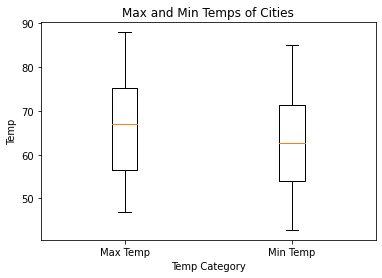

In [21]:
# Great box plots for min and max temperatures to identify outliers visually
max_temp_list = weather_cities_pd["Max Temp"].tolist()
min_temp_list = weather_cities_pd["Min Temp"].tolist()
x_lables = ["Max Temp", "Min Temp"]

#set up box plot and lables
city_temp_boxplot, ax1 = plt.subplots()
ax1.set_title("Max and Min Temps of Cities")
ax1.set_xlabel("Temp Category")
ax1.set_ylabel("Temp")
ax1.set_xticklabels(x_lables)
blue_diamond = dict(markerfacecolor='b', marker='D')

# Put data in the box plot, all four data sets in one graph
city_temp_boxplot = ax1.boxplot([max_temp_list, min_temp_list], flierprops=blue_diamond);

#save figure
city_temp_boxplot.savefig("../Resources/city_temp_boxplt.png")

In [11]:
# Remove Outliers and build new data frame and clean csv file


,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,66.99,64.00
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,66.00,62.60
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,66.00,62.60
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,63.00,59.00
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,48.20,44.01
...,...,...,...,...,...,...,...
70,"Baltimore, Maryland",Baltimore,614700.0,39.290385,-76.612189,48.99,46.00
71,"New Orleans, Louisiana",New Orleans,389648.0,29.951066,-90.071532,68.00,64.99
72,"St. Paul, Minnesota",St. Paul,302760.0,44.953703,-93.089958,55.99,53.01
73,"Minneapolis, Minnesota",Minneapolis,416021.0,44.977753,-93.265011,55.99,53.01


In [ ]:
# Rather than remove outliers - use >< for temps.